In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data=pd.read_excel("GFKnew.xlsx")
data

In [3]:
len(data)

16402

In [4]:
data["Units"].sum()

1934411.5639999998

In [5]:
data["GFK Model"].nunique()

862

In [6]:
data["Brand"].nunique()

37

In [7]:
data["Units"].sum()

1934411.5639999998

In [8]:
models_per_brand = data.groupby(["Brand","GFK Model"])["GFK Model"].nunique().sort_values(ascending=False)
models_per_brand

Brand   GFK Model                          
AEG     AEG F 66602 VI0P                       1
MIELE   MIELE G 5310 SC ACTIVE PLUS            1
        MIELE G 5332 SC FRONT ACTIVE PLUS S    1
        MIELE G 5332 SCU ACTIVE PLUS S         1
        MIELE G 5350 SCVI ACTIVE PLUS          1
                                              ..
CANDY   CANDY CMIH 1L94980                     1
        CANDY CRIN1L380PB                      1
        CANDY CSF 5E5DFB180                    1
        CANDY CSF 5E5DFW1                      1
ZENITH  ZENITH ZDWI601                         1
Name: GFK Model, Length: 862, dtype: int64

**Period of the data:** 2023-2024 All months - 2025 Jan.

**Number of unique GFK models:** 862

**Number of unique brands:** 37

**Number of unique models per unique brand**

In [9]:
unique_models_per_brand = data.groupby("Brand")["GFK Model"].nunique().sort_values(ascending=False)
modperunit = pd.DataFrame(unique_models_per_brand)
modperunit.reset_index()

,Brand,GFK Model
0,BOSCH,97
1,HOTPOINT,64
2,HOOVER,61
3,MIELE,60
4,BEKO,60
5,AEG,55
6,CANDY,53
7,INDESIT,41
8,HISENSE,39
9,SAMSUNG,38


In [11]:
nan_counts = data.isna().sum()
na_counts = data.apply(lambda x: x.str.lower().eq("n.a.").sum() if x.dtype == "object" else 0)
total_na_counts = nan_counts + na_counts
total_na_counts

In [15]:
yeni = data[(data["Brand"]!='Tradebrand') & (data["Units"]>50)]

In [16]:
len(yeni)

4646

In [17]:
yeni["GFK Model"].nunique()

509

In [18]:
yeni["Brand"].nunique()

31

In [19]:
brand_models = yeni.groupby("Brand")["GFK Model"].nunique().reset_index()

brand_models.columns = ["Brand", "Unique Model Count"]

brand_models.sort_values(by="Unique Model Count", ascending=False)


,Brand,Unique Model Count
4,BOSCH,76
13,HOTPOINT,57
2,BEKO,46
11,HISENSE,34
14,INDESIT,34
12,HOOVER,30
19,NEFF,27
17,MIELE,26
0,AEG,25
5,CANDY,25


In [20]:
brand_models_name = yeni.groupby("Brand")["GFK Model"].apply(lambda x: list(x.unique())).reset_index()

brand_models_name.columns = ["Brand", "Unique Models"]

In [21]:
import pandas as pd
import numpy as np

yeni2 = yeni.replace("n.a.", np.nan)

threshold = 0.1 * len(yeni2)

columns_to_drop = yeni2.columns[yeni2.isna().sum() > threshold]

yeni2 = yeni2.drop(columns=columns_to_drop)

print(f"Columns dropped (NaN or 'n.a.' > 10%): {list(columns_to_drop)}")


Columns dropped (NaN or 'n.a.' > 10%): ['Auto Door Open', 'Auto Dosage SYS', 'Energy Label (Before EU21)', 'Active Weighted Distribution', 'Active Numeric Distribution', 'Average Units per Shop']


C:\Users\26097879\AppData\Local\Temp\ipykernel_16360\2218139291.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  yeni2 = yeni.replace("n.a.", np.nan)


In [22]:
len(yeni2)

4646

In [23]:
yeni3=yeni2

In [24]:
yeni3

,Country,Period,GFK Model,Brand,ModelName,First Activity,Size,Energy Class,Color,Construction Type,...,Start Delay,Third Rack,Water Consumpt. Liter,Water Protect,Revenue,Units,Local Price,Price Index,Selling Shops,Turnover Share Units
32,Great Britain,Jan 2024,AEG FFB53617ZM,AEG,FFB53617ZM,20230521,FULLSIZE,D,Silver,FREESTANDING,...,YES,NO,9.9,YES,37763.552,66.266,569.875,148,237.250,0.0024
59,Great Britain,Feb 2024,AEG FFB53937ZM,AEG,FFB53937ZM,20230625,FULLSIZE,D,Silver,FREESTANDING,...,YES,YES,10.5,YES,37121.202,64.166,578.515,146,245.250,0.0020
62,Great Britain,May 2024,AEG FFB53937ZM,AEG,FFB53937ZM,20230625,FULLSIZE,D,Silver,FREESTANDING,...,YES,YES,10.5,YES,27005.629,59.270,455.634,117,241.000,0.0015
111,Great Britain,Feb 2024,AEG FFB73527ZM,AEG,FFB73527ZM,20230319,SLIMLINE,D,Silver,FREESTANDING,...,YES,YES,9.9,YES,36600.775,69.675,525.309,132,148.250,0.0034
113,Great Britain,Apr 2024,AEG FFB73527ZM,AEG,FFB73527ZM,20230319,SLIMLINE,D,Silver,FREESTANDING,...,YES,YES,9.9,YES,33826.662,62.568,540.642,137,127.250,0.0032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16227,Great Britain,Jan. 2025,BOSCH SBH4HVX00G,BOSCH,SBH4HVX00G,2024-04-14,FULLSIZE,D,not Applicable,BUILT IN/UNDER,...,YES,FULL SIZE RACK,9,YES,43393.255,51.510,842.424,172,39.550,NaN
16228,Great Britain,Jan. 2025,STATESMAN BDW4509,STATESMAN,BDW4509,2021-12-19,SLIMLINE,E,not Applicable,BUILT IN/UNDER,...,NO,NO,-,NO,28453.540,51.310,554.543,113,36.267,NaN
16229,Great Britain,Jan. 2025,SMEG DI324AQ,SMEG,DI324AQ,2023-07-02,FULLSIZE,A,not Applicable,BUILT IN/UNDER,...,YES,FULL SIZE RACK,10.5,YES,38980.128,51.152,762.043,156,56.000,NaN
16230,Great Britain,Jan. 2025,SMEG DF362DQB,SMEG,DF362DQB,2024-01-28,FULLSIZE,D,White,FREESTANDING,...,YES,FULL SIZE RACK,10.5,YES,21617.575,51.138,422.728,86,56.000,NaN


In [25]:
yeni3["Units"].sum()

1469600.8059999999

In [26]:
yeni3["GFK Model"].nunique()

509

In [27]:
yeni3["Brand"].nunique()

31

In [28]:
units_of_models = yeni3.groupby(["Brand", "ModelName"])["Units"].sum().sort_values(ascending=False)

top_20_models = units_of_models.head(20).index

top_20_data = yeni3.set_index(["Brand", "ModelName"]).loc[top_20_models].reset_index()

top_20_summary = top_20_data.groupby(["Brand", "ModelName"]).agg({
    "Units": "sum",
    "Local Price": "mean",
    "Noise Level DB": "first",
    "Water Consumpt. Liter": "first",
    "Energy Class": "first"
}).sort_values(by="Units", ascending=False)

top_20_summary.rename(columns={
    "Units": "Total Units Sold",
    "Local Price": "Average Local Price",
    "Noise Level DB": "Noise Level (dB)",
    "Water Consumpt. Liter": "Water Consumption (L)",
    "Energy Class": "Energy Class"
}, inplace=True)

top_20_summary


Total Units Sold  Average Local Price Noise Level (dB)  \
Brand    ModelName                                                              
BEKO     DIN15X20             90261.779           256.919280               49   
BOSCH    SMV2ITX18G           64259.609           432.368120               48   
BEKO     DVN04X20W            58486.825           269.949200               49   
BOSCH    SMS2ITW08G           48678.559           393.145120               50   
         SMV4HVX38G           47932.918           502.201087               46   
         SMV6ZCX01G           32249.042           725.104150               44   
BEKO     DIS15020             28485.506           270.417840               49   
BOSCH    SMS2HVW66G           27632.472           436.670522               48   
         SMV4HVX00G           26816.837           550.393300               46   
BEKO     DVS04X20W            26008.428           266.392520               49   
BOSCH    SMV4HTX27G           22545.564           469.400810               48   
INDESIT  D2I HL326 UK         17855.655           301.269350               46   
AEG      FSB42607Z            15366.907           372.258640               46   
BOSCH    SMV2HTX02G           15042.563           482.546714               46   
         SMS2HVI66G           14790.786           438.744783               48   
HISENSE  HS622E90BUK          14786.496           308.869429               47   
HOTPOINT H2I HD526 UK         13805.362           294.015188               46   
BEKO     DIN16430             13626.302           350.279667               48   
BOSCH    SPV2HKX39G           13424.893           460.362652               48   
HISENSE  HS523E15WUK          13278.848           295.291762               47   

                      Water Consumption (L) Energy Class  
Brand    ModelName                                        
BEKO     DIN15X20                      12.9            E  
BOSCH    SMV2ITX18G                    10.5            E  
BEKO     DVN04X20W                     12.9            E  
BOSCH    SMS2ITW08G                    10.5            E  
         SMV4HVX38G                     9.5            D  
         SMV6ZCX01G                     9.5            C  
BEKO     DIS15020                      11.9            E  
BOSCH    SMS2HVW66G                     9.5            E  
         SMV4HVX00G                       9            D  
BEKO     DVS04X20W                     11.9            E  
BOSCH    SMV4HTX27G                     9.5            E  
INDESIT  D2I HL326 UK                   9.5            E  
AEG      FSB42607Z                      9.9            E  
BOSCH    SMV2HTX02G                       9            D  
         SMS2HVI66G                     9.5            E  
HISENSE  HS622E90BUK                     11            E  
HOTPOINT H2I HD526 UK                   9.5            E  
BEKO     DIN16430                      11.5            D  
BOSCH    SPV2HKX39G                     8.5            E  
HISENSE  HS523E15WUK                      9            E

In [31]:
units_of_brands = yeni3.groupby("Brand")["Units"].sum().sort_values(ascending=False)

gfk_model_count = yeni3.groupby("Brand")["GFK Model"].nunique()

average_price = yeni3.groupby("Brand")["Local Price"].mean()

# Combine all metrics into a single DataFrame
brand_summary = pd.DataFrame({
    "Total Units Sold": units_of_brands,
    "Number of GFK Models": gfk_model_count,
    "Average Price": average_price
}).sort_values(by="Total Units Sold", ascending=False)

print(brand_summary)

all31_brands = brand_summary.head(31)
TOP_31=pd.DataFrame(all31_brands)
TOP_31

               Total Units Sold  Number of GFK Models  Average Price
Brand                                                               
BOSCH                538405.841                    76     584.207130
BEKO                 324838.637                    46     354.751836
HOTPOINT             128033.193                    57     353.495653
HISENSE               95741.254                    34     369.529804
INDESIT               91057.157                    34     314.324184
NEFF                  69421.383                    27     611.765581
AEG                   43554.303                    25     537.878203
BLOMBERG              34325.630                    14     429.256229
MIELE                 24704.755                    26    1094.898713
ZANUSSI               23589.734                     8     375.783152
SIEMENS               20466.299                    21     693.440377
SAMSUNG               19891.445                    23     535.294931
HOOVER                16489.411   

,Total Units Sold,Number of GFK Models,Average Price
Brand,,,
BOSCH,538405.841,76,584.207130
BEKO,324838.637,46,354.751836
HOTPOINT,128033.193,57,353.495653
HISENSE,95741.254,34,369.529804
INDESIT,91057.157,34,314.324184
NEFF,69421.383,27,611.765581
AEG,43554.303,25,537.878203
BLOMBERG,34325.630,14,429.256229
MIELE,24704.755,26,1094.898713


C:\Users\26097879\AppData\Local\Temp\ipykernel_9532\3158709297.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  brand_data.groupby("Period").apply(
C:\Users\26097879\AppData\Local\Temp\ipykernel_9532\3158709297.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  brand_data.groupby("Period").apply(
C:\Users\26097879\AppData\Local\Temp\ipykernel_9532\3158709297.py:10: DeprecationWarning: DataFrameGroupBy

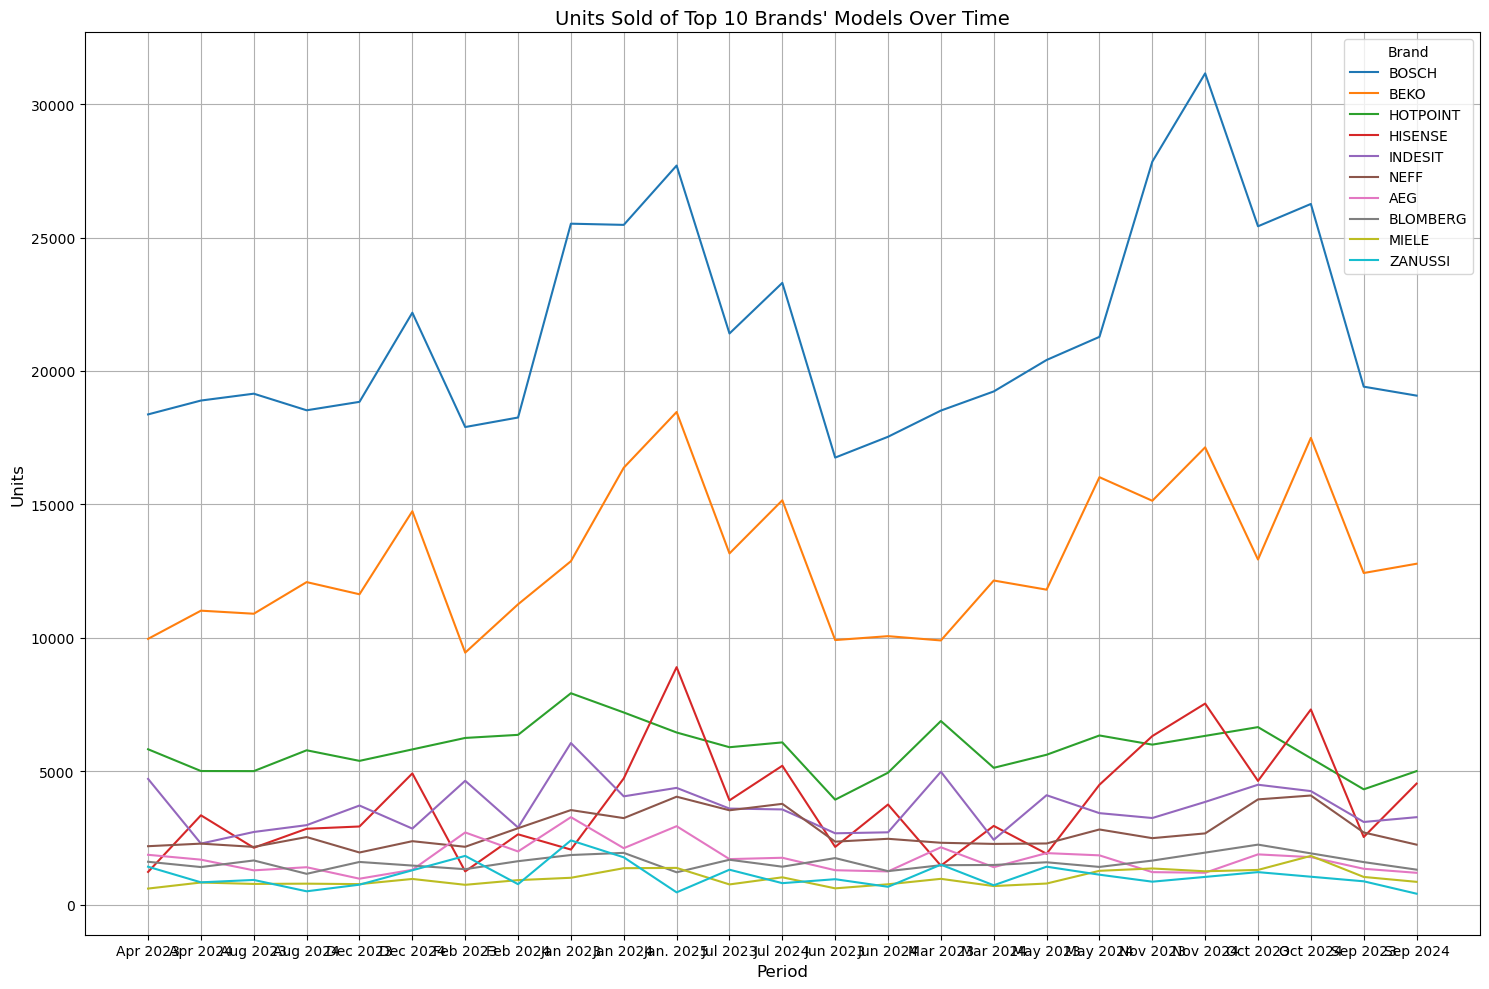

In [33]:
top_10_brands = brand_summary.head(10).index
# Time-series analysis: average price of top 10 brands' models over time
plt.figure(figsize=(15, 10))
for brand in top_10_brands:

    brand_data = yeni3[yeni3["Brand"] == brand]
    
    units_time = (
        brand_data.groupby("Period").apply(
            lambda group: (group["Units"].sum()
        )
    ))
    
    # Plot the time-series
    plt.plot(units_time.index, units_time.values, label=brand)

plt.title("Units Sold of Top 10 Brands' Models Over Time", fontsize=14)
plt.xlabel("Period", fontsize=12)
plt.ylabel("Units", fontsize=12)
plt.legend(title="Brand", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\26097879\AppData\Local\Temp\ipykernel_9532\4022248875.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  yeni["Period"] = pd.to_datetime(yeni["Period"])
C:\Users\26097879\AppData\Local\Temp\ipykernel_9532\4022248875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yeni["Period"] = pd.to_datetime(yeni["Period"])
C:\Users\26097879\AppData\Local\Temp\ipykernel_9532\4022248875.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_gr

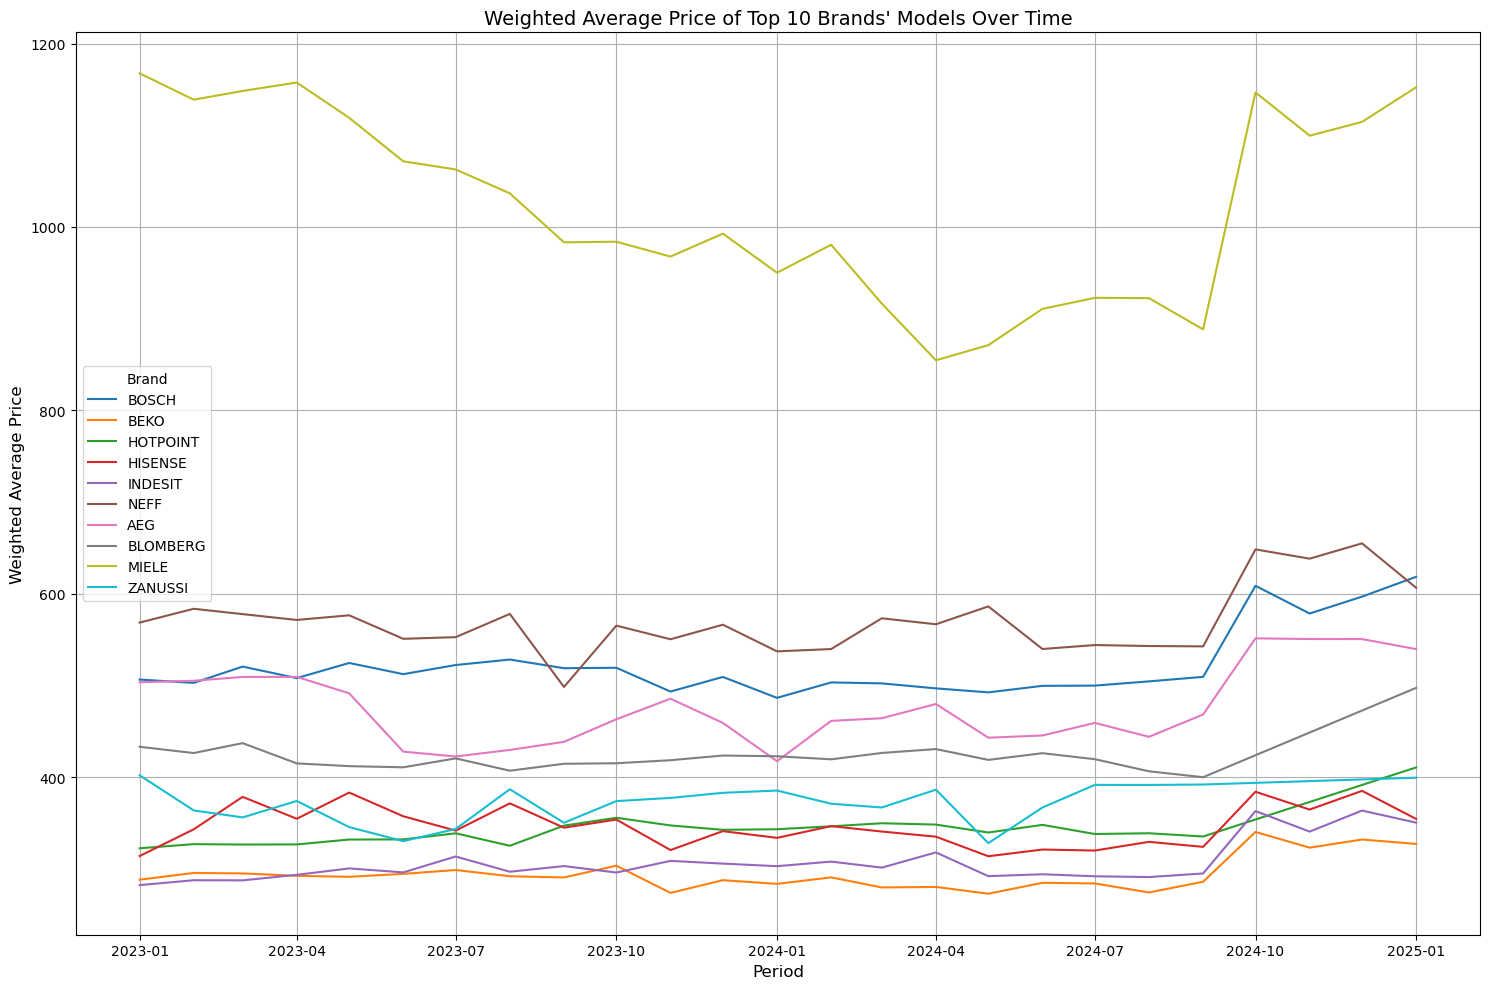

In [35]:
yeni["Period"] = pd.to_datetime(yeni["Period"])

plt.figure(figsize=(15, 10))

for brand in top_10_brands:
    brand_data = yeni[yeni["Brand"] == brand]
    
    weighted_avg_price_time = (
        brand_data.groupby("Period").apply(
            lambda group: (group["Local Price"] * group["Units"]).sum() / group["Units"].sum()
        )
        .sort_index()
    )
    
    plt.plot(weighted_avg_price_time.index, weighted_avg_price_time.values, label=brand)

plt.title("Weighted Average Price of Top 10 Brands' Models Over Time", fontsize=14)
plt.xlabel("Period", fontsize=12)
plt.ylabel("Weighted Average Price", fontsize=12)
plt.legend(title="Brand", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
yeni3['Original_Index'] = yeni3.index

units_of_models = yeni3.groupby(["Brand", "ModelName"])["Units"].sum().sort_values(ascending=False)

top_20_models = units_of_models.head(20).index

top_20_data = yeni3.set_index(["Brand", "ModelName"]).loc[top_20_models]

# Group by brand and model to aggregate features
top_20_summary = top_20_data.groupby(["Brand", "ModelName"]).agg({
    "Units": "sum", 
    "Local Price": "mean", 
    "Noise Level DB": "first",
    "Water Consumpt. Liter": "first",
    "Energy Class": "first"
}).sort_values(by="Units", ascending=False)

top_20_summary.rename(columns={
    "Units": "Total Units Sold",
    "Local Price": "Average Local Price",
    "Noise Level DB": "Noise Level (dB)",
    "Water Consumpt. Liter": "Water Consumption (L)",
    "Energy Class": "Energy Class"
}, inplace=True)


top_20_summary = top_20_summary.reset_index()

# Ensure 'yeni3' is reset with 'Original_Index' included
data_reset = yeni3.reset_index()

# Get unique brand-model pairs with the first occurrence of their original index
unique_indices = yeni3[['Brand', 'ModelName', 'Original_Index']].drop_duplicates(subset=['Brand', 'ModelName'])

# Merge unique indices back into top_20_summary
top_20_summary = top_20_summary.merge(unique_indices, on=['Brand', 'ModelName'], how='left')

top_20_summary


,Brand,ModelName,Total Units Sold,Average Local Price,Noise Level (dB),Water Consumption (L),Energy Class,Original_Index
0,BEKO,DIN15X20,90261.779,256.919280,49,12.9,E,851
1,BOSCH,SMV2ITX18G,64259.609,432.368120,48,10.5,E,1960
2,BEKO,DVN04X20W,58486.825,269.949200,49,12.9,E,984
3,BOSCH,SMS2ITW08G,48678.559,393.145120,50,10.5,E,1635
4,BOSCH,SMV4HVX38G,47932.918,502.201087,46,9.5,D,2069
5,BOSCH,SMV6ZCX01G,32249.042,725.104150,44,9.5,C,2089
6,BEKO,DIS15020,28485.506,270.417840,49,11.9,E,934
7,BOSCH,SMS2HVW66G,27632.472,436.670522,48,9.5,E,1591
8,BOSCH,SMV4HVX00G,26816.837,550.393300,46,9,D,2064
9,BEKO,DVS04X20W,26008.428,266.392520,49,11.9,E,1049


In [184]:
units_of_brands=yeni3.groupby("Brand")["Units"].sum().sort_values(ascending=False)

In [185]:
units_of_brands_df = pd.DataFrame(units_of_brands)
units_of_brands_df

,Units
Brand,
BOSCH,510709.144
BEKO,306376.459
HOTPOINT,121579.867
HISENSE,86839.755
INDESIT,86679.148
NEFF,65374.173
AEG,40611.730
BLOMBERG,33110.514
MIELE,23325.218


In [186]:
units_of_models=yeni3.groupby("GFK Model")["Units"].sum().sort_values(ascending=False)

In [187]:
units_of_models

GFK Model
BEKO DIN15X20            84650.838
BOSCH SMV2ITX18G         64092.822
BEKO DVN04X20W           54958.948
BOSCH SMS2ITW08G         48483.220
BOSCH SMV4HVX38G         47932.918
                           ...    
NEFF S145HTS01G             51.330
LG DF355FP                  51.136
AEG FSX51407Z               51.117
MONTPELLIER MDWBI4553       50.362
HAIER XS 6B0S3FSB           50.212
Name: Units, Length: 494, dtype: float64

In [188]:
top20= pd.DataFrame(units_of_models.head(20))
top20

,Units
GFK Model,
BEKO DIN15X20,84650.838
BOSCH SMV2ITX18G,64092.822
BEKO DVN04X20W,54958.948
BOSCH SMS2ITW08G,48483.220
BOSCH SMV4HVX38G,47932.918
BOSCH SMV6ZCX01G,32249.042
BOSCH SMS2HVW66G,27555.155
BEKO DIS15020,26874.676
BEKO DVS04X20W,24846.297


In [189]:
yeni3.loc[:, 'Period'] = pd.to_datetime(yeni3['Period'], format='%b %Y', errors='coerce')

grouped_data = yeni3.groupby(['GFK Model', 'Period'])['Units'].sum().reset_index()

grouped_data = grouped_data.sort_values(by=['GFK Model', 'Period'])

grouped_data


                     GFK Model     Period   Units
0     AEG FEE64917ZM 911524171 2024-11-01  64.648
1               AEG FFB53617ZM 2024-01-01  66.266
2               AEG FFB53937ZM 2024-02-01  64.166
3               AEG FFB53937ZM 2024-05-01  59.270
4               AEG FFB73527ZM 2024-02-01  69.675
...                        ...        ...     ...
4426            ZENITH ZDWI600 2024-03-01  57.433
4427            ZENITH ZDWI600 2024-05-01  58.081
4428            ZENITH ZDWI600 2024-07-01  51.183
4429            ZENITH ZDWI601 2024-08-01  58.819
4430            ZENITH ZDWI601 2024-09-01  75.319

[4431 rows x 3 columns]


In [83]:
data=yeni3

In [40]:
print("\nTest Set Performance:")
print(f"Mean Absolute Error: {test_mae}")
print(f"Root Mean Squared Error: {test_rmse}")
print(f"R-squared Score: {test_r2}")


Test Set Performance:
Mean Absolute Error: 1962.082479565944
Root Mean Squared Error: 2864.8491133485127
R-squared Score: -0.5999705604453485


# Random Forest

In [197]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns

data=pd.read_excel("GFKnew.xlsx")

data['Period'] = pd.to_datetime(data['Period'], errors='coerce')
data = data[(data["Brand"]!='Tradebrand') & (data["Units"]>50)]
data = data.replace("n.a.", np.nan)

threshold = 0.1 * len(data)

columns_to_drop = data.columns[data.isna().sum() > threshold]

data = data.drop(columns=columns_to_drop)

# Function to determine season from the date
def get_season(date):
    if pd.isnull(date):
        return None
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Apply the function to create a 'Season' column
data['Season'] = data['Period'].apply(get_season)

categorical_columns = [
    "Brand", "Size", "Noise Level DB", "Energy Class", "Season",
    "Water Protect", "Construction Type", "Half Load", "Integration",
    "Inverter Motor", "Material", "NO OF Placesets", "NO. OF Progr.", "Program Autom.", 
    "Remaining Time", "Sliding Hinges", "Smart Connect", "Start Delay",
    "Third Rack", "Water Consumpt. Liter"
]

# Step 1: Handle missing values
data = data.replace("n.a.", np.nan)
numerical_features = ["Local Price"]
all_features = categorical_columns + numerical_features

# Drop rows with missing values in relevant columns
data = data.dropna(subset=all_features + ["Units"])


C:\Users\26097879\AppData\Local\Temp\ipykernel_20084\1465575510.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Period'] = pd.to_datetime(data['Period'], errors='coerce')
C:\Users\26097879\AppData\Local\Temp\ipykernel_20084\1465575510.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace("n.a.", np.nan)


Shape of X: (3938, 21)
Shape of y: (3938,)
Mean Absolute Error: 113.79142923857863
Root Mean Squared Error: 243.90277302103945
R-squared Score: 0.700133196350252


C:\plm\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


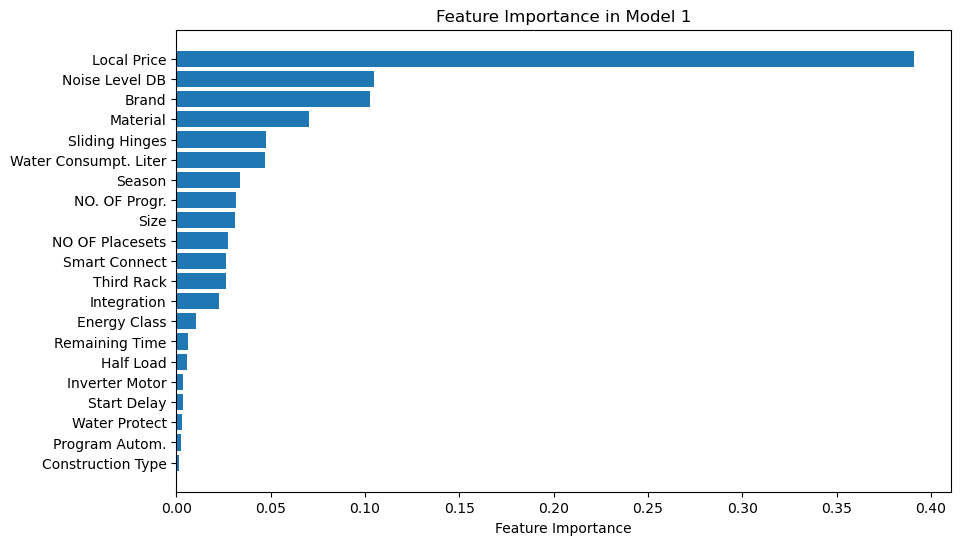

Cross-Validation R2 Scores: [ 0.45901897  0.14892651  0.35692935 -1.25139053  0.10495307]
Mean Cross-Validation R2 Score: -0.03631252678537376


In [198]:
# Step 2: LabelEncoder
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le  # Save encoders for reverse transformation if needed

# Step 3: Define features (X) and target (y)
X = data[all_features]
y = data["Units"]

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")

# Step 7: Feature Importance Analysis
importances = rf_model.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_indices = importances.argsort()[::-1]
sorted_feature_names = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importances, align='center')
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Model 1")
plt.gca().invert_yaxis()
plt.show()

# Step 8: Cross-validation
cross_val_scores = cross_val_score(rf_model, X, y, cv=5, scoring="r2")
print(f"Cross-Validation R2 Scores: {cross_val_scores}")
print(f"Mean Cross-Validation R2 Score: {np.mean(cross_val_scores)}")


# RandomizedSearchCV for Hyperparameter Tuning

Shape of X: (3938, 21)
Shape of y: (3938,)
Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\plm\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
140 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
62 fits failed with the following error:
Traceback (most recent call last):
  File "C:\plm\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\plm\anaconda\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\plm\anaconda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\plm\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 9

Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Mean Absolute Error: 108.00749614705136
Root Mean Squared Error: 221.5157444735741
R-squared Score: 0.7526544429968808


C:\plm\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Cross-Validation R2 Scores: [ 0.58866093 -0.00228739  0.40833934  0.11969345  0.26645918]
Mean Cross-Validation R2 Score: 0.276173104519036


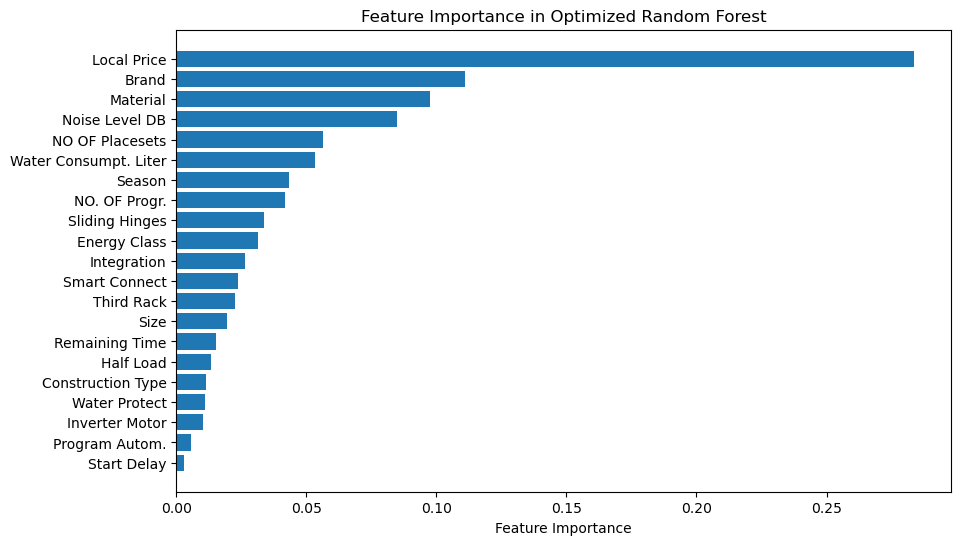

In [199]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

X = data[all_features]
y = data["Units"]

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 500, 1000],  # Number of trees
    'max_depth': [10, 20, 30, None],        # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],        # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],          # Minimum samples per leaf
    'max_features': ['auto', 'sqrt'],       # Number of features considered at each split
}

# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# RandomizedSearchCV for hyperparameter tuning
rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings to sample
    cv=5,       # 5-fold cross-validation
    scoring="neg_mean_squared_error",  # Scoring metric
    verbose=2,
    random_state=42,
    n_jobs=-1   # Use all processors
)

# Fit RandomizedSearchCV
rf_random_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", rf_random_search.best_params_)

# Evaluate the optimized model
optimized_rf = rf_random_search.best_estimator_
y_pred = optimized_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")

# Cross-validation
cross_val_scores = cross_val_score(optimized_rf, X, y, cv=5, scoring="r2")
print(f"Cross-Validation R2 Scores: {cross_val_scores}")
print(f"Mean Cross-Validation R2 Score: {np.mean(cross_val_scores)}")

importances = optimized_rf.feature_importances_
feature_names = X.columns

sorted_indices = importances.argsort()[::-1]
sorted_feature_names = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importances, align='center')
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Optimized Random Forest")
plt.gca().invert_yaxis()
plt.show()


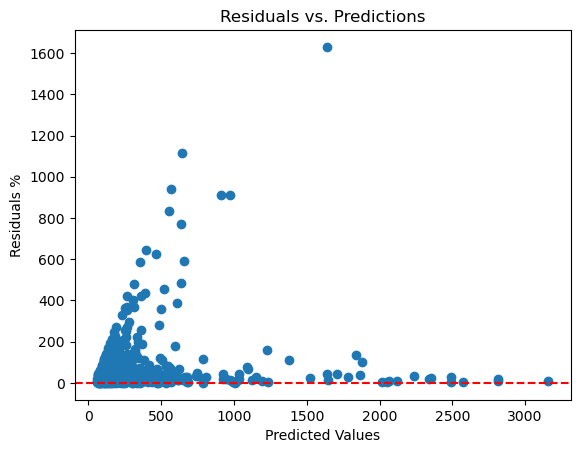

In [200]:
import matplotlib.pyplot as plt
residuals_percent = (abs(y_test - y_pred))/y_test*100
plt.scatter(y_pred, residuals_percent)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals %")
plt.title("Residuals vs. Predictions")
plt.show()

# Forecasting Units w/ MLP

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Define categorical and numerical columns
categorical_columns = [
    "Size", "Energy Class", "Season",
    "Water Protect", "Half Load", "Integration",
    "Inverter Motor", "Material", "NO OF Placesets", "NO. OF Progr.", "Program Autom.", 
    "Remaining Time", "Sliding Hinges", "Smart Connect",
    "Third Rack", "Water Consumpt. Liter"
]
numerical_features = ["Local Price", "Noise Level DB"]

# Ensure all selected columns exist in the DataFrame
available_columns = data.columns
categorical_columns = [col for col in categorical_columns if col in available_columns]
numerical_features = [col for col in numerical_features if col in available_columns]

# Ensure there are no missing values in relevant columns
data = data.dropna(subset=categorical_columns + numerical_features + ["Units"])

# Encode categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Define features and target
X = data[categorical_columns + numerical_features]
y = data["Units"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale only numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Define the model architecture
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1)  # Single output for regression
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=75,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Evaluate the model
y_pred = model.predict(X_test).flatten()
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

Epoch 1/75


D:\Users\26097879\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 340773.6875 - mae: 292.9409 - val_loss: 302606.8438 - val_mae: 295.5774 - learning_rate: 0.0010
Epoch 2/75
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 337369.6562 - mae: 291.5341 - val_loss: 303913.2500 - val_mae: 302.9483 - learning_rate: 0.0010
Epoch 3/75
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 331546.8438 - mae: 288.6042 - val_loss: 310472.1875 - val_mae: 318.1173 - learning_rate: 0.0010
Epoch 4/75
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 322651.5938 - mae: 283.9098 - val_loss: 307502.6250 - val_mae: 321.0024 - learning_rate: 0.0010
Epoch 5/75
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 312841.0000 - mae: 278.8205 - val_loss: 299146.4688 - val_mae: 310.9009 - learning_rate: 5.0000e-04
Epoch 6/75
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 305910.6875 - mae: 275.4171 - val_loss: 290516.4062 - val_mae: 305.0642 - learning_rate: 5.0000e-04
Epoch 7/75
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 300588.0625 - mae: 27

C:\plm\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Absolute Error: 165.15603072204053
Root Mean Squared Error: 326.8159957237339
R-squared Score: 0.5066850362197931


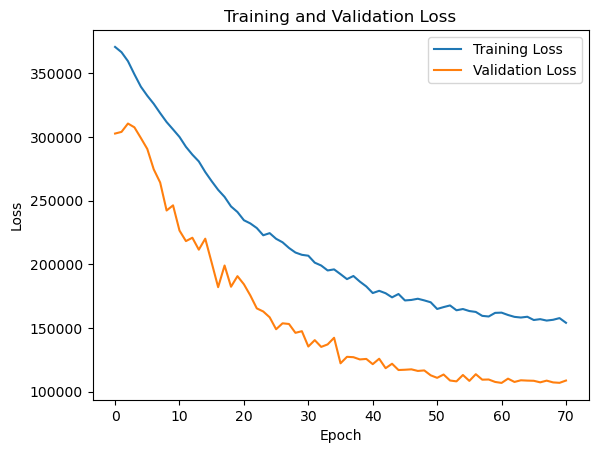

In [88]:
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [89]:
for index, row in brand_models_name.iterrows():
    print(f"\nBrand: {row['Brand']}\n")
    print("Unique Models:", row['Unique Models'])


Brand: AEG

Unique Models: ['AEG FFB53617ZM', 'AEG FFB53937ZM', 'AEG FFB73527ZM', 'AEG FFX52607ZW', 'AEG FSB42607Z', 'AEG FSE62407P', 'AEG FSE72507P', 'AEG FSE73507P', 'AEG FSE74747P', 'AEG FSE75737P', 'AEG FSE83837P', 'AEG FSK32610Z', 'AEG FSK52617Z', 'AEG FSK52917Z', 'AEG FSK83828P', 'AEG FSS53637Z', 'AEG FSS53907Z', 'AEG FSS63607P', 'AEG FSS64907Z', 'AEG FSS82827P', 'AEG FSX52927Z']

Brand: AMICA

Unique Models: ['AMICA ADF410WH', 'AMICA ADF430WH', 'AMICA ADI430', 'AMICA ADI460', 'AMICA ADI630', 'AMICA ADI650']

Brand: BEKO

Unique Models: ['BEKO BDEN38640FG', 'BEKO BDFN15430G', 'BEKO BDFN15430W', 'BEKO BDFN15430X', 'BEKO BDFN15431W', 'BEKO BDFN26440W2', 'BEKO BDFN26520QB', 'BEKO BDFN26520QW', 'BEKO BDFN26520QX', 'BEKO BDFN36560WCFG', 'BEKO BDFN36650CX', 'BEKO BDFS16020W', 'BEKO BDIN16431', 'BEKO BDIN36520Q', 'BEKO BDIN38440', 'BEKO BDIN38560CF', 'BEKO BDIN38640C', 'BEKO BDIN38640F', 'BEKO BDIN38641C', 'BEKO BDIN38650C', 'BEKO BDIS38040Q', 'BEKO DEN59420DX', 'BEKO DIN15C20', 'BEKO 

In [92]:
!pip install scikeras

Defaulting to user installation because normal site-packages is not writeable


# Optimal Cluster Number

Silhouette Score for 2 clusters: 0.07315823598812277
Silhouette Score for 3 clusters: 0.08014806113154944
Silhouette Score for 4 clusters: 0.08209838037809647
Silhouette Score for 5 clusters: 0.06750848627189841
Silhouette Score for 6 clusters: 0.07349511969468304
Silhouette Score for 7 clusters: 0.07363950497842103
Silhouette Score for 8 clusters: 0.0856763417246015
Silhouette Score for 9 clusters: 0.08010188746911943
Silhouette Score for 10 clusters: 0.08277197841498944
Silhouette Score for 11 clusters: 0.0950230704972772
Silhouette Score for 12 clusters: 0.09597818628280375
Silhouette Score for 13 clusters: 0.09832440672874011
Silhouette Score for 14 clusters: 0.10732099175270601


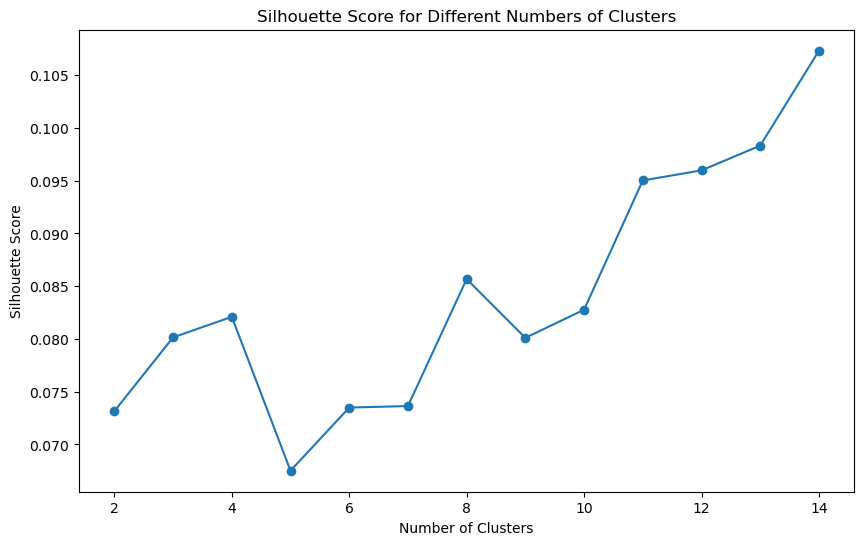

In [185]:
cluster_range = range(2, 15)
silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_features_scaled)
    score = silhouette_score(df_features_scaled, cluster_labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for {n_clusters} clusters: {score}")

# Step 5: Plot silhouette scores to visualize the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Numbers of Clusters")
plt.show()

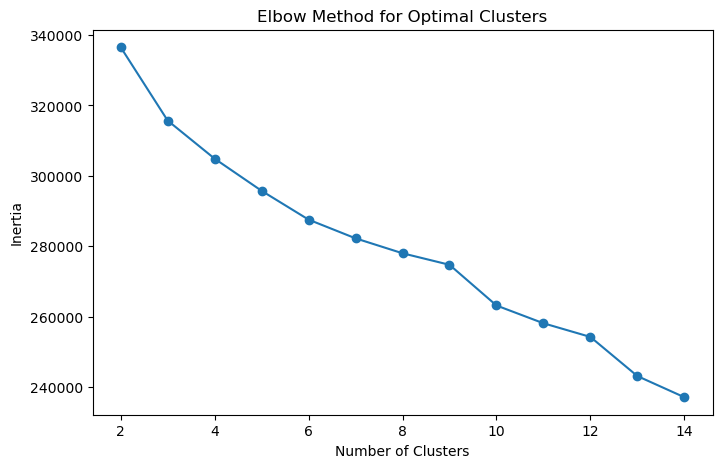

In [186]:
#ELBOW METHOD

inertia_values = [] #--> (sum of squared distances within-cluster)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_features_scaled)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Run for n clusters

In [187]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# K-Means clustering
kmeans = KMeans(n_clusters=9, random_state=42)
df_features['Cluster'] = kmeans.fit_predict(df_features_scaled)

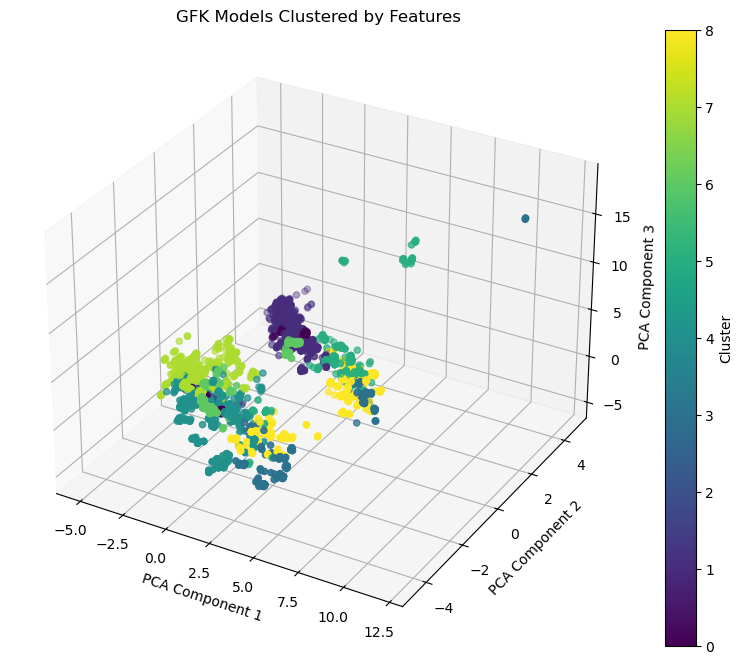

In [188]:
# PCA to reduce dimensions to 3 components for visualization
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(df_features_scaled)

# 3D Plot for clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], 
                c=df_features['Cluster'], cmap='viridis', marker='o')

ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
plt.title("GFK Models Clustered by Features")
plt.colorbar(sc, label='Cluster')
plt.show()

df_features['GFK Model'] = data['GFK Model']
#output_path = '9clustered_GFK_model.xlsx'
#df_features.to_excel(output_path, index=False)

#print(f"Clustering complete. Results saved to {output_path}.")

In [189]:
# Ensure that 'Units' and 'Local Price' columns are numeric
df_features['Units'] = data['Units']
df_features['Local Price'] = data['Local Price']
df_features['Units'] = pd.to_numeric(df_features['Units'], errors='coerce')
df_features['Local Price'] = pd.to_numeric(df_features['Local Price'], errors='coerce')

# safely group by 'Cluster' and calculate descriptive statistics for 'Units' and 'Local Price'
cluster_summary = df_features.groupby('Cluster').agg(
    Units_Min=('Units', 'min'),
    Units_Max=('Units', 'max'),
    Units_Mean=('Units', 'mean'),
    Units_StdDev=('Units', 'std'),
    LocalPrice_Min=('Local Price', 'min'),
    LocalPrice_Max=('Local Price', 'max'),
    LocalPrice_Mean=('Local Price', 'mean'),
    LocalPrice_StdDev=('Local Price', 'std')
)

print("Cluster Summary for Units and Local Price Distribution:")
cluster_summary

Cluster Summary for Units and Local Price Distribution:


,Units_Min,Units_Max,Units_Mean,Units_StdDev,LocalPrice_Min,LocalPrice_Max,LocalPrice_Mean,LocalPrice_StdDev
Cluster,,,,,,,,
0,50.128,1174.089,214.961473,232.521656,409.803,875.460,601.749426,132.247519
1,50.017,2561.740,233.683711,294.251763,281.529,1142.399,524.041030,163.091153
2,50.224,380.632,127.015232,60.410813,367.414,594.784,466.302389,49.939786
3,50.064,1734.022,215.045689,256.389163,217.781,471.296,294.904615,33.499828
4,50.023,2113.521,273.251902,281.050287,177.363,1538.468,422.319386,150.849269
5,50.237,1181.861,182.993249,166.132364,197.290,559.819,309.175546,46.210305
6,50.184,5653.938,821.378243,1050.007262,292.401,643.641,457.480559,76.479646
7,50.212,4711.256,340.215477,548.239565,265.475,1784.964,698.310191,262.332538
8,50.008,5585.355,475.848402,800.461570,220.665,499.507,310.076105,43.489644


# AEG W/WEB SEARCHED SPECS.

In [37]:
aeg_data=pd.read_excel("AEG_Dishwasher_Specifications_Expanded.xlsx")

In [38]:
aeg_data

,GFK Model,Type,Size,Capacity (Place Settings),Energy Efficiency Rating,Water Consumption per Cycle (L),Noise Level (dB),Quick Wash Function,Eco Mode,Intensive Wash,...,Availability of Spare Parts,John Lewis (0-5),AO.com (0-5),Currys (0-10),Which? (0-100%),Trustpilot (0-5),Appliances Direct (0-5),Currys (0-5),Which? (0-5),Average Rating (0-5)
0,AEG FFB53617ZM,Freestanding,Full-size,14,D,9.9,44,Yes,Yes,Yes,...,Yes,4.4,4.4,8.5,78.0,4.2,4.5,4.25,3.90,4.275000
1,AEG FFB53937ZM,Freestanding,Full-size,14,D,9.9,44,Yes,Yes,Yes,...,Yes,4.9,4.8,9.0,82.0,4.3,4.6,4.50,4.10,4.533333
2,AEG FFB73527ZM,Freestanding,Full-size,15,D,9.9,44,Yes,Yes,Yes,...,Yes,4.9,4.6,8.0,80.0,4.1,4.4,4.00,4.00,4.333333
3,AEG FFX52607ZW,Freestanding,Full-size,14,D,9.9,44,Yes,Yes,Yes,...,Yes,4.0,NaN,7.5,75.0,4.0,4.3,3.75,3.75,3.960000
4,AEG FSB42607Z,Integrated,Full-size,13,E,9.9,46,Yes,Yes,Yes,...,Yes,4.0,4.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AEG FSE62407P,Integrated,Slimline,9,E,9.9,46,Yes,Yes,Yes,...,Yes,4.1,NaN,8.0,77.0,4.2,4.4,4.00,3.85,4.110000
6,AEG FSE72507P,Integrated,Full-size,15,D,9.9,44,Yes,Yes,Yes,...,Yes,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AEG FSE73507P,Integrated,Full-size,15,D,9.9,44,Yes,Yes,Yes,...,Yes,4.7,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AEG FSE74747P,Integrated,Full-size,15,D,9.9,44,Yes,Yes,Yes,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AEG FSE75737P,Integrated,Full-size,15,D,9.9,44,Yes,Yes,Yes,...,Yes,4.0,NaN,8.5,79.0,4.3,4.5,4.25,3.95,4.200000


In [39]:
grouped_data = data[data["GFK Model"].isin(['AEG FFB53617ZM', 'AEG FFB53937ZM', 'AEG FFB73527ZM', 'AEG FFX52607ZW', 'AEG FSB42607Z', 'AEG FSE62407P', 'AEG FSE72507P', 'AEG FSE73507P', 'AEG FSE74747P', 'AEG FSE75737P', 'AEG FSE83837P', 'AEG FSK32610Z', 'AEG FSK52617Z', 'AEG FSK52917Z', 'AEG FSK83828P', 'AEG FSS53637Z', 'AEG FSS53907Z', 'AEG FSS63607P', 'AEG FSS64907Z', 'AEG FSS82827P', 'AEG FSX52927Z'])]

In [40]:
grouped_data

,Country,Period,GFK Model,Brand,ModelName,First Activity,Size,Energy Class,Auto Door Open,Auto Dosage SYS,...,Water Protect,Revenue,Units,Local Price,Price Index,Selling Shops,Active Weighted Distribution,Active Numeric Distribution,Average Units per Shop,Turnover Share Units
29,Great Britain,Jul 2023,AEG FFB53617ZM,AEG,FFB53617ZM,20230521.0,FULLSIZE,D,n.a.,NO,...,YES,1303.192,2.008,649.000,160.0,52.000,0.1499,0.0129,0.039,0.0002
30,Great Britain,Aug 2023,AEG FFB53617ZM,AEG,FFB53617ZM,20230521.0,FULLSIZE,D,n.a.,NO,...,YES,5489.318,9.428,582.236,141.0,173.250,0.2926,0.0448,0.054,0.0005
31,Great Britain,Sep 2023,AEG FFB53617ZM,AEG,FFB53617ZM,20230521.0,FULLSIZE,D,n.a.,NO,...,YES,3963.779,7.210,549.761,134.0,170.000,0.2909,0.0453,0.042,0.0004
32,Great Britain,Oct 2023,AEG FFB53617ZM,AEG,FFB53617ZM,20230521.0,FULLSIZE,D,n.a.,NO,...,YES,5838.933,10.088,578.800,140.0,56.000,0.2690,0.0143,0.180,0.0004
33,Great Britain,Dec 2023,AEG FFB53617ZM,AEG,FFB53617ZM,20230521.0,FULLSIZE,D,n.a.,NO,...,YES,8653.043,14.634,591.297,148.0,167.000,0.2760,0.0453,0.088,0.0008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,Great Britain,May 2024,AEG FSX52927Z,AEG,FSX52927Z,20240519.0,FULLSIZE,E,YES,NO,...,YES,18547.030,37.277,497.545,128.0,181.000,0.3067,0.0470,0.206,0.0015
510,Great Britain,Jun 2024,AEG FSX52927Z,AEG,FSX52927Z,20240519.0,FULLSIZE,E,YES,NO,...,YES,20222.892,43.771,462.011,117.0,341.923,0.3573,0.0902,0.128,0.0019
511,Great Britain,Jul 2024,AEG FSX52927Z,AEG,FSX52927Z,20240519.0,FULLSIZE,E,YES,NO,...,YES,54723.953,120.739,453.242,117.0,377.951,0.3747,0.0984,0.319,0.0038
512,Great Britain,Aug 2024,AEG FSX52927Z,AEG,FSX52927Z,20240519.0,FULLSIZE,E,YES,NO,...,YES,78962.138,235.775,334.904,86.0,375.213,0.3992,0.1042,0.628,0.0087


In [41]:
selected_grouped_data = grouped_data[["GFK Model", "Country", "Period", "Brand", "ModelName", "First Activity", "Units" ,"Revenue" ,"Local Price","Price Index"]]
merged_data = selected_grouped_data.merge(aeg_data, on="GFK Model", how="inner")

In [42]:
merged_data[["Units","GFK Model","Revenue"]]

,Units,GFK Model,Revenue
0,2.008,AEG FFB53617ZM,1303.192
1,9.428,AEG FFB53617ZM,5489.318
2,7.210,AEG FFB53617ZM,3963.779
3,10.088,AEG FFB53617ZM,5838.933
4,14.634,AEG FFB53617ZM,8653.043
...,...,...,...
300,37.277,AEG FSX52927Z,18547.030
301,43.771,AEG FSX52927Z,20222.892
302,120.739,AEG FSX52927Z,54723.953
303,235.775,AEG FSX52927Z,78962.138


In [43]:
merged_data.to_excel("AEG DATA MERGED.xlsx")

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: ONE HOT ENCODING
categorical_columns = [
    "Country", "GFK Model","Size", "Type", "Capacity (Place Settings)", "Energy Efficiency Rating", "Water Consumption per Cycle (L)",
    "Noise Level (dB)","Quick Wash Function", "Eco Mode" , "Intensive Wash", "Half Load Option",
    "Delay Start Timer", "Drying Performance", "Adjustable Racks", "Cutlery Tray/Basket", "Interior Material", "Child Lock", "Display Type", 
    "Wi-Fi Connectivity", "Auto-Door Opening", "Sensor Technology",
    "Self-Cleaning Filter", "Leak Protection System", "Interior Lighting","Finish/Color", "Handle Design", "Control Panel Location",
    "Installation Type", "Warranty Period", "Energy Consumption per 100 Cycles (kWh)", "Water Softener", "Rinse Aid Indicator",
    "Salt Indicator", "Interior Shelving Features", "Anti-Flood Device", "Time Remaining Indicator", "Energy Star Certification",
    "Drying System Type", "Inverter Motor" , "Spray Arm Design", "Detergent Dispenser Type", "Door Hinges", "Height Adjustable Top Rack",
    "Interior Capacity Flexibility", "Cycle Duration", "Annual Energy Cost Estimate", "Smart Home Compatibility", "Availability of Spare Parts" 
]

data_encoded = pd.get_dummies(merged_data[categorical_columns], drop_first=True)

# Step 2: selecting and merging encoded and numeric columns
# defining columns for clustering
features = [
    "GFK Model", "Size", "Type", "Capacity (Place Settings)", "Energy Efficiency Rating", "Water Consumption per Cycle (L)",
    "Noise Level (dB)","Quick Wash Function", "Eco Mode" , "Intensive Wash", "Half Load Option",
    "Delay Start Timer", "Drying Performance", "Adjustable Racks", "Cutlery Tray/Basket", "Interior Material", "Child Lock", "Display Type", 
    "Wi-Fi Connectivity", "Auto-Door Opening", "Sensor Technology",
    "Self-Cleaning Filter", "Leak Protection System", "Interior Lighting","Finish/Color", "Handle Design", "Control Panel Location",
    "Installation Type", "Warranty Period", "Energy Consumption per 100 Cycles (kWh)", "Water Softener", "Rinse Aid Indicator",
    "Salt Indicator", "Interior Shelving Features", "Anti-Flood Device", "Time Remaining Indicator", "Energy Star Certification",
    "Drying System Type", "Inverter Motor" , "Spray Arm Design", "Detergent Dispenser Type", "Door Hinges", "Height Adjustable Top Rack",
    "Interior Capacity Flexibility", "Cycle Duration", "Annual Energy Cost Estimate", "Smart Home Compatibility", "Availability of Spare Parts" 
]

# combining one-hot encoded data with numeric features
df_features = pd.concat([merged_data[features].select_dtypes(include=['number']), data_encoded], axis=1)

# Step 3: scaling the combined data for clustering
scaler = StandardScaler()
df_features_scaled = scaler.fit_transform(df_features)

C:\plm\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\plm\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\plm\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score for 2 clusters: 0.268670650674281
Silhouette Score for 3 clusters: 0.21849596017978337
Silhouette Score for 4 clusters: 0.24359560282169238


C:\plm\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\plm\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\plm\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score for 5 clusters: 0.2339105651181716
Silhouette Score for 6 clusters: 0.320619815174957
Silhouette Score for 7 clusters: 0.35086060437607325


C:\plm\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\plm\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\plm\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score for 8 clusters: 0.4098236525163928
Silhouette Score for 9 clusters: 0.4616495397797253
Silhouette Score for 10 clusters: 0.4972069324066596


C:\plm\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\plm\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\plm\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\plm\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chun

Silhouette Score for 11 clusters: 0.5430261419005219
Silhouette Score for 12 clusters: 0.5991783128959651
Silhouette Score for 13 clusters: 0.649761719258633
Silhouette Score for 14 clusters: 0.7154268615344421


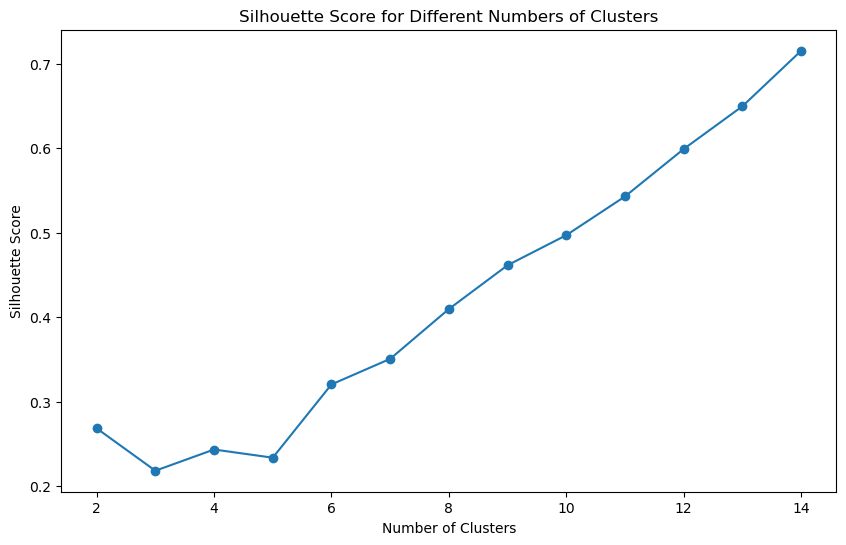

In [45]:
cluster_range = range(2, 15)
silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_features_scaled)
    score = silhouette_score(df_features_scaled, cluster_labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for {n_clusters} clusters: {score}")

# Step 5: Plot silhouette scores to visualize the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Numbers of Clusters")
plt.show()

C:\plm\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\plm\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\plm\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\plm\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chun

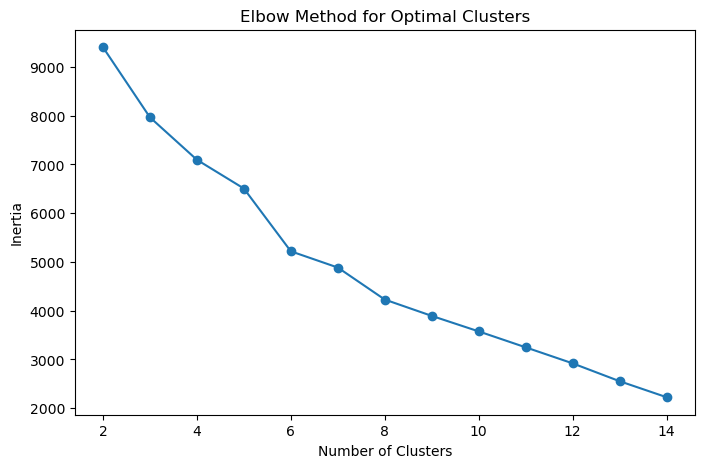

In [46]:
#ELBOW METHOD

inertia_values = [] #--> (sum of squared distances within-cluster)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_features_scaled)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [47]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# K-Means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
df_features['Cluster'] = kmeans.fit_predict(df_features_scaled)


C:\plm\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


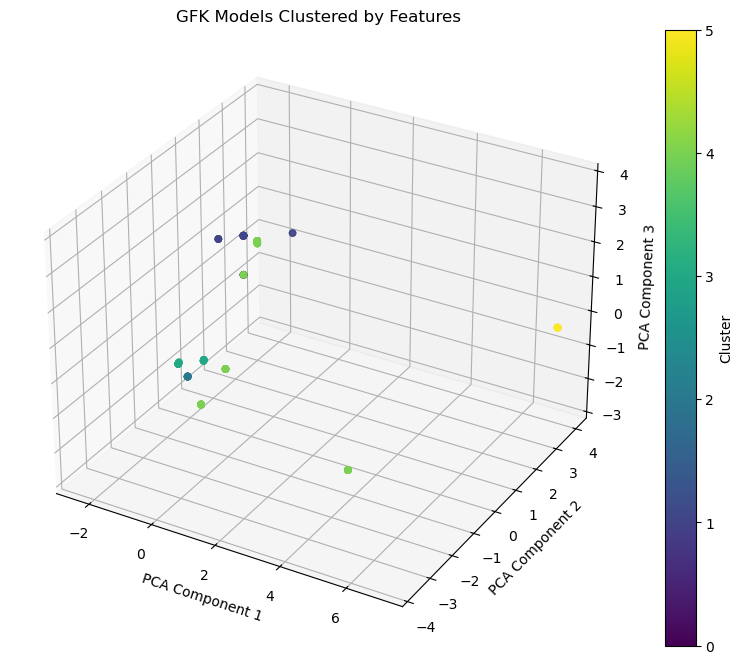

In [48]:
# PCA to reduce dimensions to 3 components for visualization
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(df_features_scaled)

# 3D Plot for clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], 
                c=df_features['Cluster'], cmap='viridis', marker='o')

ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
plt.title("GFK Models Clustered by Features")
plt.colorbar(sc, label='Cluster')
plt.show()

df_features['GFK Model'] = data['GFK Model']
#output_path = '9clustered_GFK_model.xlsx'
#df_features.to_excel(output_path, index=False)

#print(f"Clustering complete. Results saved to {output_path}.")

In [49]:
df_features['Units'] = merged_data['Units']
df_features['Local Price'] = merged_data['Local Price']
df_features['GFK Model'] = merged_data['GFK Model']
df_features['Units'] = pd.to_numeric(df_features['Units'], errors='coerce')
df_features['Local Price'] = pd.to_numeric(df_features['Local Price'], errors='coerce')

cluster_summary = df_features.groupby('Cluster').agg(
    Units_Min=('Units', 'min'),
    Units_Max=('Units', 'max'),
    Units_Mean=('Units', 'mean'),
    Units_StdDev=('Units', 'std'),
    LocalPrice_Min=('Local Price', 'min'),
    LocalPrice_Max=('Local Price', 'max'),
    LocalPrice_Mean=('Local Price', 'mean'),
    LocalPrice_StdDev=('Local Price', 'std')
)

print("Cluster Summary for Units and Local Price Distribution:")
cluster_summary

Cluster Summary for Units and Local Price Distribution:


,Units_Min,Units_Max,Units_Mean,Units_StdDev,LocalPrice_Min,LocalPrice_Max,LocalPrice_Mean,LocalPrice_StdDev
Cluster,,,,,,,,
0,6.000,114.144,43.483400,41.979187,502.737,540.890,524.329400,13.685601
1,4.008,476.298,90.622181,79.614358,302.811,776.019,534.907976,91.620042
2,4.016,85.883,41.731118,26.626817,504.107,649.436,568.853412,44.299449
3,3.000,644.295,119.234551,126.602568,177.363,889.721,614.037141,137.079970
4,2.008,1398.184,204.978594,284.389317,227.115,814.038,506.736693,124.551157
5,12.024,118.413,49.864238,28.162232,429.681,552.980,483.141857,32.393128


In [50]:
df_features[["Cluster", "Units", "GFK Model"]]

,Cluster,Units,GFK Model
0,4,2.008,AEG FFB53617ZM
1,4,9.428,AEG FFB53617ZM
2,4,7.210,AEG FFB53617ZM
3,4,10.088,AEG FFB53617ZM
4,4,14.634,AEG FFB53617ZM
...,...,...,...
300,3,37.277,AEG FSX52927Z
301,3,43.771,AEG FSX52927Z
302,3,120.739,AEG FSX52927Z
303,3,235.775,AEG FSX52927Z
